# Chapter 6: Sentiment analysis with Logistic Regression

### Importing the necessary packages

In [11]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils
np.random.seed(42)

In [12]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

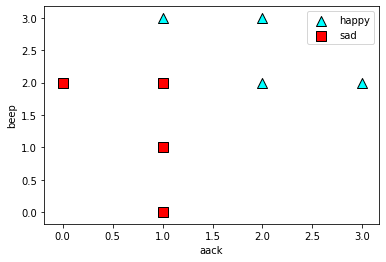

In [13]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

### Logistic regression

In [14]:
def sigmoid(x):
    # Note, in the book it appears as 1/(1+np.exp(-x)). Both expressions are equivalent, but the expression
    # below behaves better with small floating point numbers.
    return np.exp(x)/(1+np.exp(x))

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
    pred = 1.0*prediction(weights, bias, features)
    return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

In [15]:
# Alternate way of writing log-loss

def soft_relu(x):
    return np.log(1+np.exp(x))

def alternate_log_loss(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return soft_relu((pred-label)*score(weights, bias, features))

def total_alternate_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

In [16]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.05):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

In [17]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.0001, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    utils.draw_line(weights[0], weights[1], bias, linewidth=2)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

/Users/luisserrano/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


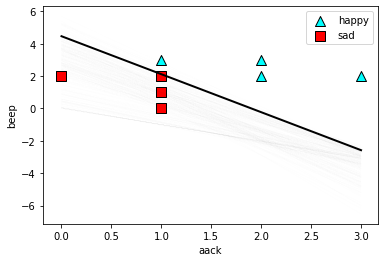

([0.7928127092339353, 0.3377822908998618], -1.506879864990892)

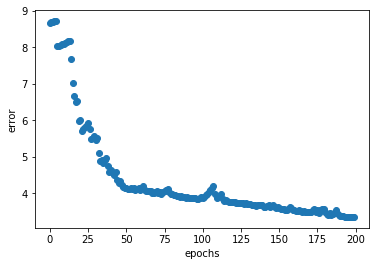

In [18]:
logistic_regression_algorithm(features, labels)

# Logistic regression using scikit-learn

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Fit the model to the data
logistic_regression.fit(features, labels)

# Predict the labels for the features
predictions_lr = logistic_regression.predict(features)

print("Logistic Regression Predictions:", predictions_lr)

Logistic Regression Predictions: [0 0 0 0 1 1 1 1]


In [32]:
# Get coefficients and intercept from the fitted model
coefficients_lr = logistic_regression.coef_[0]
intercept_lr = logistic_regression.intercept_[0]

print("Logistic Regression Coefficients:", coefficients_lr)
print("Logistic Regression Intercept:", intercept_lr)

Logistic Regression Coefficients: [1.00458154 0.93718206]
Logistic Regression Intercept: -3.1600974622062727


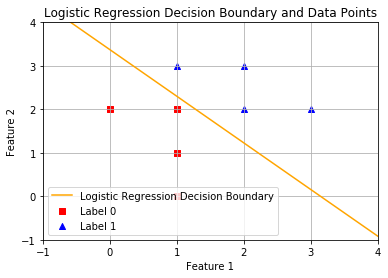

In [33]:
utils.plot_boundary(features, labels, coefficients_lr, intercept_lr)